## KPI 2: Cobertura de Fibra Óptica por Región

### Descripción
Este KPI mide el porcentaje de accesos a internet mediante tecnología de fibra óptica en cada región, en relación con el total de accesos registrados. La fibra óptica es considerada la tecnología más avanzada en términos de velocidad y confiabilidad, por lo que este indicador permite evaluar qué regiones están liderando la modernización de infraestructura de internet.

### Fórmula del KPI
Cobertura de Fibra Óptica (%) = (Accesos mediante Fibra Óptica / Total de Accesos) * 100

### Objetivo
Identificar las regiones con mayor y menor cobertura de fibra óptica para orientar esfuerzos de inversión y modernización tecnológica en aquellas áreas que presentan mayores rezagos.

### Ejemplo
Si una región tiene 50,000 accesos mediante fibra óptica y un total de 200,000 accesos, la cobertura de fibra óptica sería:

Cobertura de Fibra Óptica (%) = (50,000 / 200,000) * 100 = 25%

Este análisis ayudará a comprender las disparidades en la cobertura tecnológica y a priorizar la implementación de infraestructura avanzada en las regiones que más lo necesitan.


## Carga y Exploración de Datos

Para analizar el KPI de Cobertura de Fibra Óptica en Argentina, comenzaremos cargando los datos necesarios, específicamente la información de accesos a internet por tecnología y el mapa de conectividad. Realizaremos una exploración inicial para verificar la estructura de los datos y confirmar que tenemos las columnas necesarias para el análisis.


In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Cargar el archivo Parquet de accesos a internet procesado
accesos_internet = pd.read_parquet('data/processed/internet_accesos_tecnologia.parquet')
mapa_conectividad = pd.read_parquet('data/processed/mapa_conectividad.parquet')

# Mostrar las primeras filas de los datasets para verificar la carga
print("Accesos a Internet - Primeras filas:")
print(accesos_internet.head())

print("\nMapa de Conectividad - Primeras filas:")
print(mapa_conectividad.head())


Accesos a Internet - Primeras filas:
    Año  Trimestre        Provincia    ADSL  Cablemodem  Fibra óptica  \
0  2019          2     Buenos Aires  214055     2722466       1849476   
1  2019          2  Capital Federal   54102     1144781        230402   
2  2019          2        Catamarca    4951       10303         58355   
3  2019          2            Chaco    9448       57935         68944   
4  2019          2           Chubut   25955       80704         26516   

   Wireless  Otros    Total  
0    138638  64745  4989380  
1      4493  29821  1463599  
2      1384     81    75074  
3      8407   2358   147092  
4     31118   9930   174223  

Mapa de Conectividad - Primeras filas:
      Provincia     Partido          Localidad  Población   ADSL  Cablemódem  \
0  BUENOS AIRES  25 de Mayo         25 de Mayo      23408   True        True   
1  BUENOS AIRES  25 de Mayo    Agustín Mosconi        280  False       False   
2  BUENOS AIRES  25 de Mayo          Del Valle        899   True

## Filtrado y Preparación de Datos para Cobertura de Fibra Óptica

Observamos que el dataset de accesos a internet contiene información detallada de los accesos por tipo de tecnología en cada provincia. En este paso, extraeremos los datos específicos de fibra óptica para cada provincia, y calcularemos el porcentaje de estos accesos en relación con el total de accesos por provincia. Esto nos permitirá medir la adopción de la tecnología de fibra óptica en cada región de Argentina.


In [6]:
# Filtrar los accesos de fibra óptica por provincia
accesos_fibra_optica = accesos_internet[['Provincia', 'Fibra óptica', 'Total']]

# Calcular el porcentaje de cobertura de fibra óptica
accesos_fibra_optica['Cobertura Fibra Óptica (%)'] = (accesos_fibra_optica['Fibra óptica'] / accesos_fibra_optica['Total']) * 100

# Revisar el resultado
print(accesos_fibra_optica.head())


         Provincia  Fibra óptica    Total  Cobertura Fibra Óptica (%)
0     Buenos Aires       1849476  4989380                   37.068253
1  Capital Federal        230402  1463599                   15.742153
2        Catamarca         58355    75074                   77.729973
3            Chaco         68944   147092                   46.871346
4           Chubut         26516   174223                   15.219575


## Cálculo de la Cobertura Promedio de Fibra Óptica por Región

Para obtener una visión más amplia, agruparemos las provincias por región y calcularemos el promedio de cobertura de fibra óptica en cada región. De esta manera, podremos identificar patrones regionales en la adopción de esta tecnología, observando dónde se concentra la infraestructura moderna de internet en el país.


In [7]:
# Usamos el mismo diccionario de provincias con su región correspondiente que utilizamos antes
provincias_regiones = {
    'Buenos Aires': 'Buenos Aires y CABA',
    'CABA': 'Buenos Aires y CABA',
    'Catamarca': 'NOA',
    'Jujuy': 'NOA',
    'La Rioja': 'NOA',
    'Salta': 'NOA',
    'Santiago del Estero': 'NOA',
    'Tucumán': 'NOA',
    'Chaco': 'NEA',
    'Corrientes': 'NEA',
    'Formosa': 'NEA',
    'Misiones': 'NEA',
    'Córdoba': 'Centro',
    'Entre Ríos': 'Centro',
    'Santa Fe': 'Centro',
    'Chubut': 'Patagonia',
    'La Pampa': 'Patagonia',
    'Neuquén': 'Patagonia',
    'Río Negro': 'Patagonia',
    'Santa Cruz': 'Patagonia',
    'Tierra del Fuego': 'Patagonia',
    'Mendoza': 'Cuyo',
    'San Juan': 'Cuyo',
    'San Luis': 'Cuyo'
}

# Añadir columna de región al DataFrame
accesos_fibra_optica['Región'] = accesos_fibra_optica['Provincia'].map(provincias_regiones)

# Calcular el promedio de cobertura de fibra óptica por región
cobertura_fibra_optica_region = accesos_fibra_optica.groupby('Región')['Cobertura Fibra Óptica (%)'].mean().reset_index()
print(cobertura_fibra_optica_region)


                Región  Cobertura Fibra Óptica (%)
0  Buenos Aires y CABA                   14.398474
1               Centro                    9.352521
2                 Cuyo                   10.175209
3                  NEA                    8.185279
4                  NOA                   14.679716
5            Patagonia                    9.261702


## Visualización de la Cobertura de Fibra Óptica por Región

Para visualizar el nivel de adopción de la tecnología de fibra óptica en cada región, utilizaremos un gráfico de barras que muestra el porcentaje de cobertura de fibra óptica en cada región. Este gráfico nos permitirá identificar claramente las regiones con mayor y menor adopción de esta tecnología avanzada, destacando áreas que podrían beneficiarse de un aumento en infraestructura de fibra óptica.


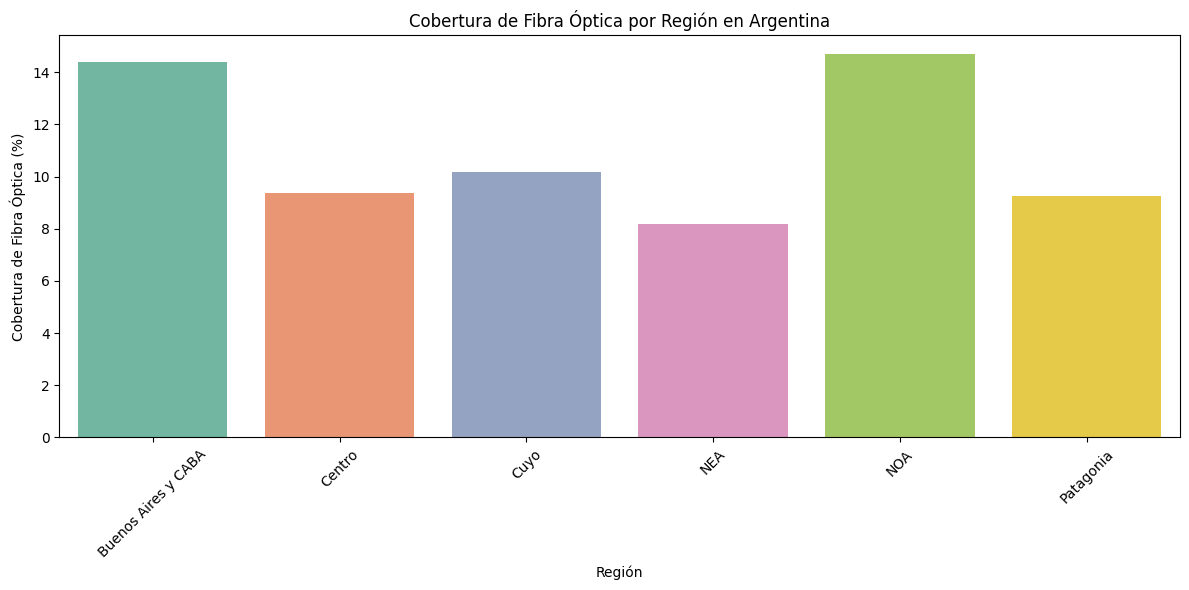

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de colores y estilo
sns.set_palette("coolwarm")
plt.figure(figsize=(12, 6))

# Gráfico de barras para la cobertura de fibra óptica por región
sns.barplot(x='Región', y='Cobertura Fibra Óptica (%)', data=cobertura_fibra_optica_region, palette="Set2")
plt.xlabel('Región')
plt.ylabel('Cobertura de Fibra Óptica (%)')
plt.title('Cobertura de Fibra Óptica por Región en Argentina')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Mapa de Calor de Cobertura de Fibra Óptica por Región

Este mapa de calor muestra la cobertura promedio de fibra óptica en cada región de Argentina. Las regiones con una mayor cobertura de fibra óptica están coloreadas con tonos más oscuros, mientras que las regiones con menor cobertura se muestran en tonos más claros. Esto nos permite observar visualmente las diferencias en infraestructura de internet entre las distintas áreas del país.


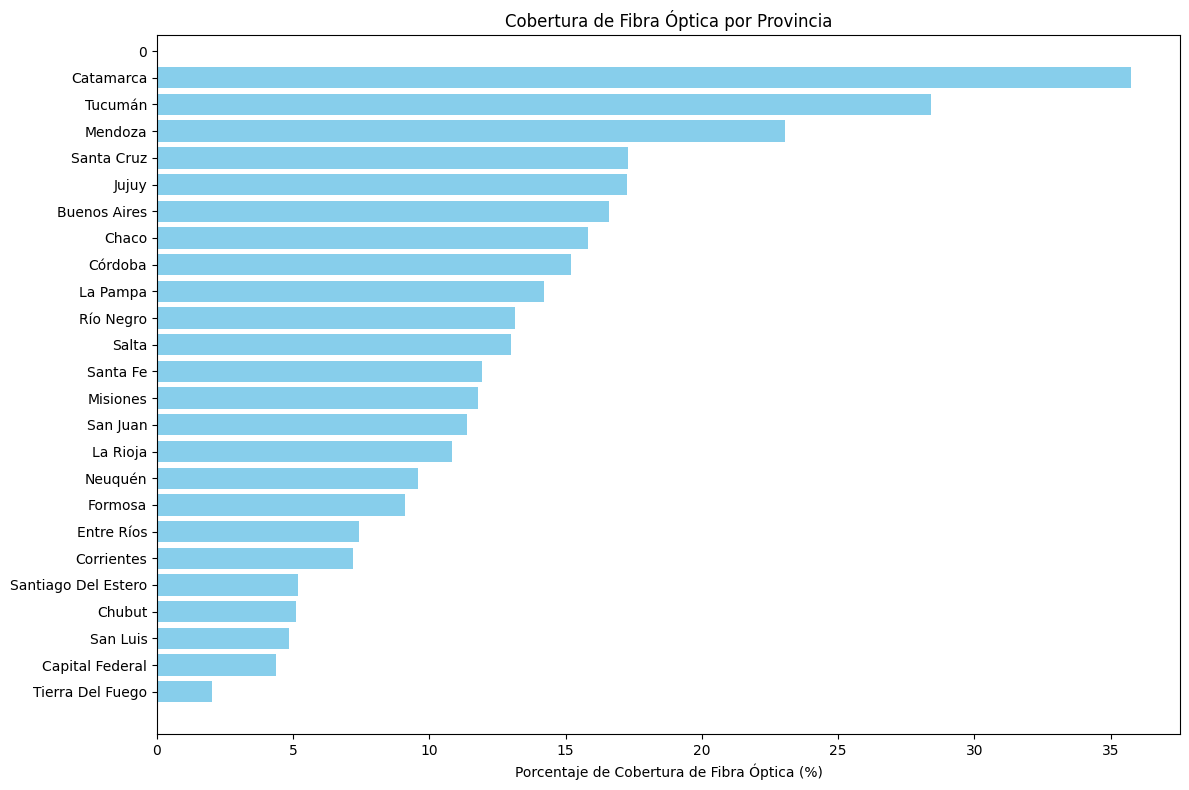

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo de accesos a internet
accesos_internet = pd.read_parquet('data/processed/internet_accesos_tecnologia.parquet')

# Agrupar por provincia y sumar los accesos de cada tipo
accesos_provincia = accesos_internet.groupby('Provincia').sum().reset_index()

# Calcular el porcentaje de cobertura de fibra óptica sobre el total de accesos
accesos_provincia['Cobertura Fibra (%)'] = (accesos_provincia['Fibra óptica'] / accesos_provincia['Total']) * 100

# Ordenar las provincias por cobertura de fibra óptica de menor a mayor
accesos_provincia_sorted = accesos_provincia.sort_values(by='Cobertura Fibra (%)')

# Crear un gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh(accesos_provincia_sorted['Provincia'], accesos_provincia_sorted['Cobertura Fibra (%)'], color='skyblue')
plt.xlabel('Porcentaje de Cobertura de Fibra Óptica (%)')
plt.title('Cobertura de Fibra Óptica por Provincia')
plt.tight_layout()
plt.show()


### Observaciones Clave del Gráfico de Cobertura de Fibra Óptica por Provincia
- **Disparidades en la Infraestructura de Fibra Óptica:** Se observan marcadas diferencias en la cobertura de fibra óptica entre provincias. Provincias como Catamarca, Tucumán y Mendoza muestran una alta adopción de fibra óptica en comparación con el total de accesos, lo que indica un avance significativo en su infraestructura tecnológica. En contraste, provincias como Tierra del Fuego, Capital Federal y San Luis presentan porcentajes de cobertura mucho más bajos.

- **Relación con la Densidad Poblacional:** Las provincias con menor población, como Tierra del Fuego, tienden a tener una infraestructura de internet menos desarrollada en términos de fibra óptica. Esto puede deberse a la menor demanda y a los altos costos de instalación en regiones menos densamente pobladas, lo que limita la expansión de tecnologías avanzadas.

- **Concentración de Infraestructura en Provincias Grandes:** Algunas provincias grandes, como Buenos Aires, presentan una cobertura de fibra óptica moderada. Esto podría estar relacionado con la alta densidad de población en áreas urbanas y suburbanas, donde la infraestructura se distribuye entre diferentes tecnologías, como el ADSL y el cablemódem, además de la fibra óptica.

- **Variabilidad Regional en la Adopción de Fibra Óptica:** La visualización sugiere que provincias de la región NOA (como Catamarca y Tucumán) han adoptado la fibra óptica de manera más intensiva que otras regiones, mientras que el NEA y la Patagonia muestran una menor proporción de accesos a esta tecnología en comparación con el total. Este patrón puede indicar políticas locales o inversiones regionales específicas que han promovido la expansión de la fibra óptica en ciertas áreas.

### Impacto en la Toma de Decisiones
- **Priorización de Expansión de Fibra Óptica en Regiones con Menor Cobertura:** Las provincias con baja cobertura de fibra óptica pueden beneficiarse de políticas que incentiven la inversión en infraestructura, especialmente en áreas rurales y menos desarrolladas.
- **Foco en Provincias con Mayor Demanda:** Provincias con mayor población y menor cobertura de fibra óptica, como Buenos Aires, podrían requerir estrategias específicas para equilibrar la oferta de tecnologías y mejorar la calidad de la conexión en áreas densamente pobladas.
### Conclusión
El análisis del porcentaje de cobertura de fibra óptica por provincia revela que, si bien algunas provincias están bien equipadas con esta tecnología, persisten desigualdades en su adopción a lo largo del país. La expansión de la fibra óptica en áreas menos cubiertas y la optimización de la infraestructura en provincias grandes y densamente pobladas podrían ser estrategias efectivas para promover una conectividad de alta calidad en todo el territorio argentino.